<a href="https://colab.research.google.com/github/ASHUTOSH-kumar2178/Machine-Learning-Projects/blob/main/Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data= pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [11]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
data.children.unique()

array([0, 1, 3, 2, 5, 4])

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data.sex.drop_duplicates())
data.sex= label_encoder.transform(data.sex)


label_encoder.fit(data.smoker.drop_duplicates())
data.smoker= label_encoder.transform(data.smoker)

label_encoder.fit(data.region.drop_duplicates())
data.region= label_encoder.transform(data.region)


In [20]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [23]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

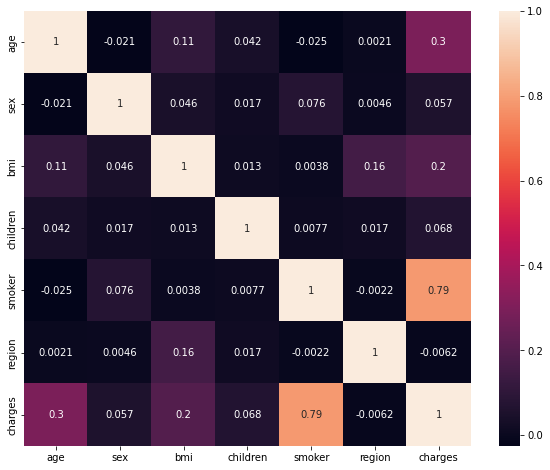

In [25]:
f,ax= plt.subplots(figsize = (10,8))
corr= data.corr()
sb.heatmap(corr,ax= ax,annot=True)

Smoker Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


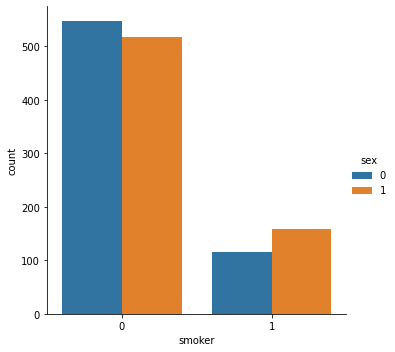

In [28]:
sb.factorplot(x="smoker" ,kind="count" , hue ="sex" ,data= data)

#in this figure the first Largest bar is of Non Smoker Cteogories with 0->female 1-> male  and 1 Cateogories is with Smoker with male and female

BMI analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


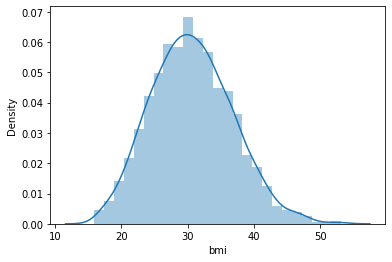

In [29]:
ax= sb.distplot(data['bmi'])

CHildren Count

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


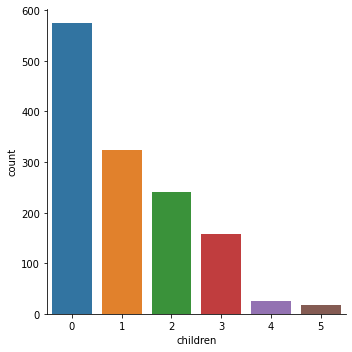

In [30]:
sb.factorplot(x="children", kind= "count", data= data)

In [ ]:
#ML MODEL

In [38]:
x= data.drop(data.columns[[6,5]],axis=1)
y= data['charges']

In [39]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
sc_x = MinMaxScaler()
xtrain=sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

In [43]:
xtrain[0:2]

array([[0.15217391, 0.        , 0.49838579, 0.        , 0.        ],
       [0.02173913, 0.        , 0.50417003, 0.4       , 1.        ]])

In [53]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#linear= LinearRegression()
dt= DecisionTreeRegressor()
svr= svm.SVR()
rf= RandomForestRegressor()

In [68]:
#linear.fit(xtrain,y_train)

LinearRegression()

In [69]:
dt.fit(xtrain,y_train)

DecisionTreeRegressor()

In [70]:
svr.fit(xtrain,y_train)

SVR()

In [71]:
rf.fit(xtrain,y_train)

RandomForestRegressor()

In [72]:
#ypred_linear= linear.predict(xtest)
ypred_dt= dt.predict(xtest)
ypred_svr= svr.predict(xtest)
ypred_rf= rf.predict(xtest)

In [82]:
import  math
from sklearn.metrics import mean_squared_error
print("Support Vector Machine:",math.sqrt(mean_squared_error((ypred_svr),y_test)))
print("Decission Tree:",math.sqrt(mean_squared_error((ypred_dt),y_test)))
print("Random Forest :",math.sqrt(mean_squared_error((ypred_rf),y_test)))

Support Vector Machine: 13220.640822963524
Decission Tree: 6992.957223781329
Random Forest : 4778.562195556644
